# Яременко Вікторія Практична 8

Завдання 1. Розробка рекомендаційної системи

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
  user item  rating  timestamp
0  196  242     3.0  881250949
1  186  302     3.0  891717742
2   22  377     1.0  878887116
3  244   51     2.0  880606923
4  166  346     1.0  886397596
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done 

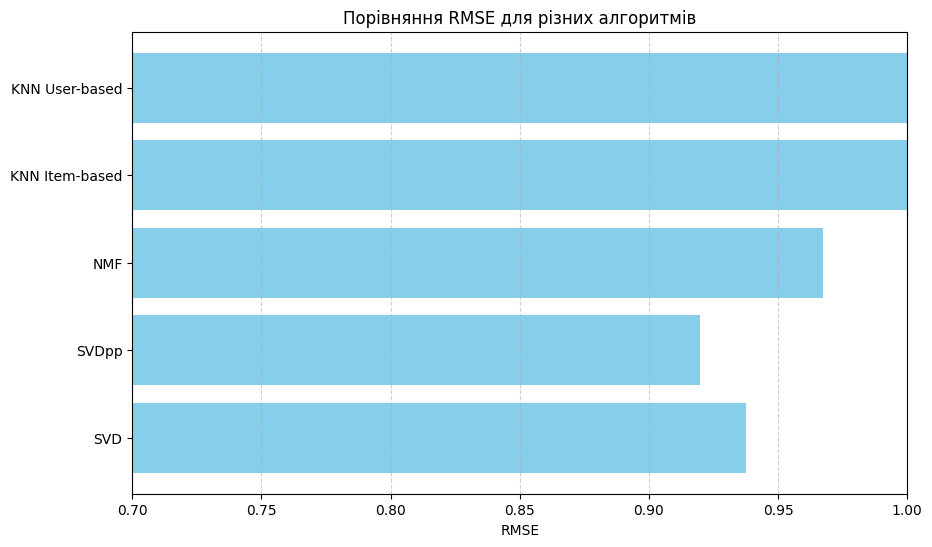

Найкращий алгоритм: SVDpp
Висновки:
Найкращий алгоритм рекомендації: SVDpp
Середнє RMSE для SVDpp: 0.9196248098918589


In [7]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

# Завантаження та огляд датасету movielens-100k
data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df.head())

# Ініціалізація читача для оцінок у діапазоні від 1 до 5
reader = Reader(rating_scale=(1, 5))

# Завантаження даних у форматі Surprise
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)

# Оголошення алгоритмів, які ми хочемо порівняти
algorithms = [SVD(), SVDpp(), NMF(), KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
              KNNBasic(sim_options={'name': 'cosine', 'user_based': True})]

# Перелік алгоритмів для назви на графіку
algorithm_names = ['SVD', 'SVDpp', 'NMF', 'KNN Item-based', 'KNN User-based']

# Збереження RMSE для кожного алгоритму
rmse_values = []

# Проведення крос-валідації та збереження RMSE
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_mean = np.mean(results['test_rmse'])
    rmse_values.append(rmse_mean)

# Візуалізація RMSE для кожного алгоритму
plt.figure(figsize=(10, 6))
plt.barh(algorithm_names, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('Порівняння RMSE для різних алгоритмів')
plt.xlim(0.7, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Знайдення найкращого алгоритму
best_algorithm_index = np.argmin(rmse_values)
best_algorithm = algorithms[best_algorithm_index]
best_algorithm_name = algorithm_names[best_algorithm_index]

print(f'Найкращий алгоритм: {best_algorithm_name}')

# Висновки
print("Висновки:")
print(f"Найкращий алгоритм рекомендації: {best_algorithm_name}")
print(f"Середнє RMSE для {best_algorithm_name}: {rmse_values[best_algorithm_index]}")


Висновок: В цій практичній роботі я навчилася і здійснила наступні важливі кроки у розробці рекомендаційної системи з використанням бібліотеки Surprise та датасету "movielens-100k": огляд та завантаження даних, встановлення та імпорт бібліотеки Surprise, вибір та порівняння алгоритмів, підбір найкращих параметрів, візуалізація результатів.